In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [7]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis


## Dataset path location using glob

In [8]:
building_house=glob.glob('augmented_dataset/building_house/*.*')
mosque=glob.glob('augmented_dataset/mosque/*.*')
temple=glob.glob('augmented_dataset/temple/*.*')
tinshed=glob.glob('augmented_dataset/tinshed/*.*')


In [9]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))

Building house data :  419
Mosque data:  423
Temple data:  404
Tinshed data:  321


In [10]:
dataset_classes=[building_house,mosque,temple,tinshed]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  4


## Make dataset and labels using keras.preprocessing.image

In [11]:
from tensorflow.keras.preprocessing import image

In [12]:
data=[]
labels=[]

In [13]:
print('Data length: ',len(data))
print('labels length: ',len(labels))

Data length:  0
labels length:  0


In [14]:
# Building house
for i in building_house:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(0)

In [15]:
#mosque
for i in mosque:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(1)

In [16]:
#temple
for i in temple:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(2)

In [17]:
#tinshed
for i in tinshed:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(3)

## Length of the data and types

In [18]:
print('Total data: ',len(data))
print('Labels of data: ',len(labels))

Total data:  1567
Labels of data:  1567


In [19]:
print('Data type: ',type(data))
print('Labels type: ',type(labels))

Data type:  <class 'list'>
Labels type:  <class 'list'>


## Convert the list into numpy array

In [20]:
data_array=np.array(data)
labels_array=np.array(labels)

In [21]:
print('Data type: ',type(data_array))
print('Labels type: ',type(labels_array))

Data type:  <class 'numpy.ndarray'>
Labels type:  <class 'numpy.ndarray'>


## Data split using sklearn train_test_split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test =train_test_split(data_array,labels_array,test_size=0.2,random_state=42)

In [24]:
print('x train shape: ',x_train.shape)
print('x test shape: ',x_test.shape)
print('y train shape: ',y_train.shape)
print('y test shape: ',y_test.shape)

x train shape:  (1253, 224, 224, 3)
x test shape:  (314, 224, 224, 3)
y train shape:  (1253,)
y test shape:  (314,)


## plot random image and label
if range(0,255) ->  int then plt.imshow(img)

range(0.0,255.0) ->float scale the image into (0,1) by dividing 255 then plt.imshow()

In [25]:
random_image=x_train[0]
random_image_labels=y_train[0]
print('image shape: ',random_image.shape)
print('Data types of image is : ',random_image.dtype)
print('image output label: ',random_image_labels)

image shape:  (224, 224, 3)
Data types of image is :  float32
image output label:  0


Label:  0


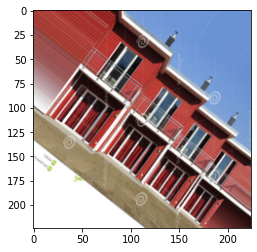

In [26]:
print('Label: ',random_image_labels)
plt.imshow(random_image/255)
plt.show()

## Normalize the data for training
x_test -> [0,1]


In [27]:
print('Data range is [0,255]: ',x_train[0][0][0])

Data range is [0,255]:  [157.  56.  48.]


In [28]:
x_test_normalize=x_test/255
x_train_normalize=x_train/255

In [29]:
print('Data range is [0,1]: ',x_train_normalize[0][0][0])

Data range is [0,1]:  [0.6156863  0.21960784 0.1882353 ]


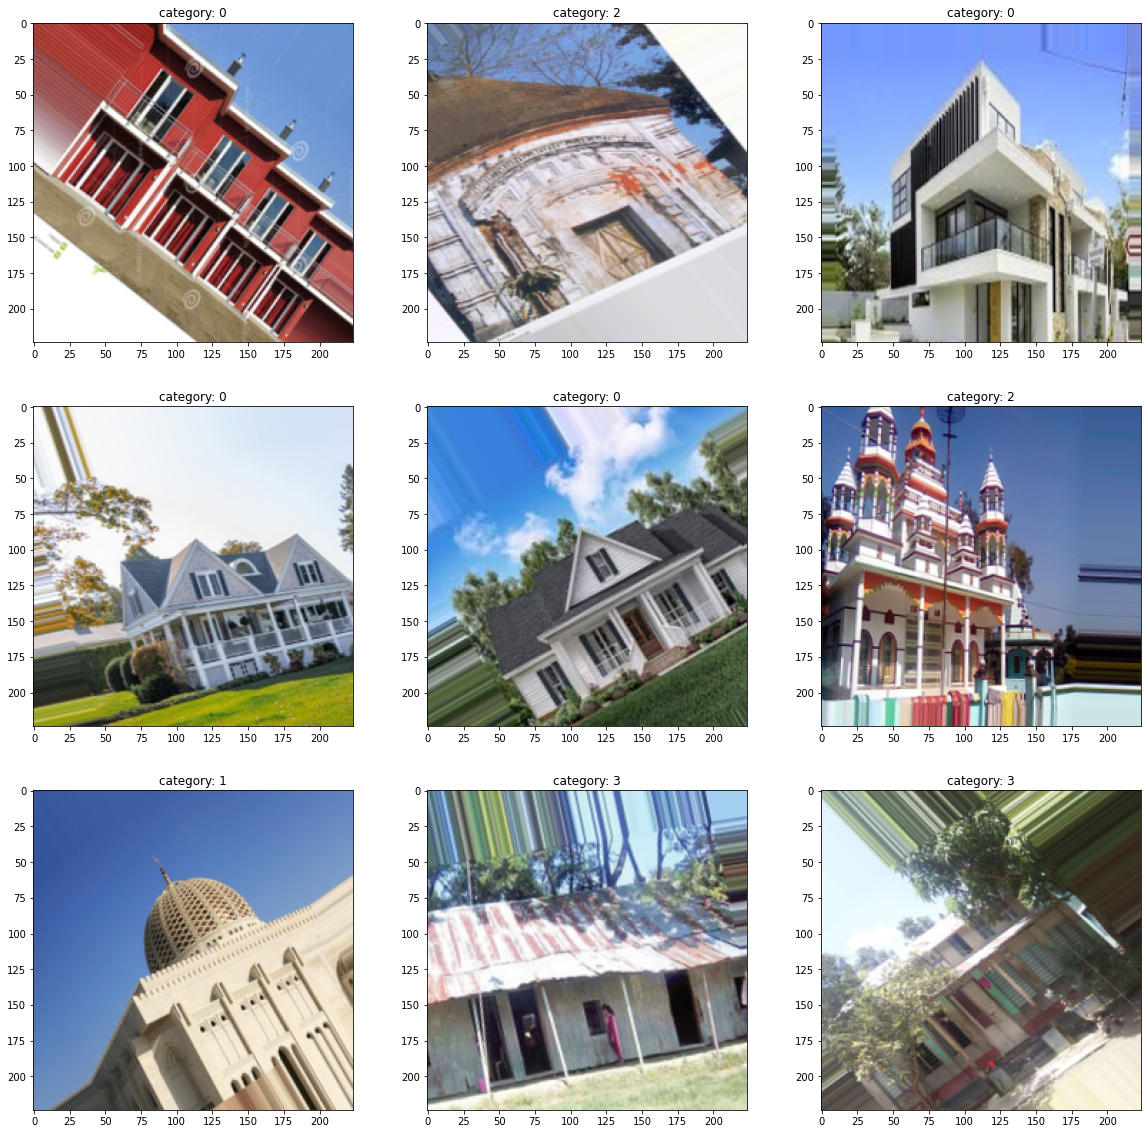

In [30]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train_normalize[i])
    plt.title('category: '+str(y_train[i]))
plt.show()

## Categorial the labels using one hot encoding Keras

In [31]:
from tensorflow.keras.utils import to_categorical


In [32]:
print('Non categorical values : ',y_test[:10])

Non categorical values :  [1 1 1 0 0 3 0 1 1 1]


### categorical y_test and y_train

In [33]:
y_test_categorical=to_categorical(y_test)
y_train_categorical=to_categorical(y_train)

In [34]:
print('Categorical values : \n',y_test_categorical[:10])

Categorical values : 
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]



## Define model architecture
### CNN requires x_test norlalize values [0,1] and y_test categorical values [0. 0. 1. 0.]

In [35]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

In [36]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(total_class,activation='softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [38]:
model.layers

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Compile the model using loss and optimizer

In [39]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Train the model and save the model suing call backs fucntion

In [40]:
import tensorflow

In [41]:
tensorflow.config.run_functions_eagerly(True)

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [43]:
checkpointer.filepath

'building.model.best.hdf5'

In [44]:
x_test_normalize.shape

(314, 224, 224, 3)

In [45]:
y_test_categorical.shape

(314, 4)

In [46]:
history=model.fit(x_test_normalize,y_test_categorical,epochs=100,batch_size=32,steps_per_epoch=3,callbacks=[checkpointer])

C:\Users\Shimul\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/100
3/3 [==============================] - 5s 2s/step - loss: 5.2158 - accuracy: 0.1979
Epoch 2/100
3/3 [==============================] - 4s 1s/step - loss: 1.4523 - accuracy: 0.3021
Epoch 3/100
3/3 [==============================] - 4s 1s/step - loss: 1.3872 - accuracy: 0.2604
Epoch 4/100
3/3 [==============================] - 4s 1s/step - loss: 1.3705 - accuracy: 0.3111
Epoch 5/100
3/3 [==============================] - 4s 1s/step - loss: 1.3791 - accuracy: 0.2188
Epoch 6/100
3/3 [==============================] - 4s 1s/step - loss: 1.3551 - accuracy: 0.3229
Epoch 7/100
3/3 [==============================] - 4s 1s/step - loss: 1.4062 - accuracy: 0.2000
Epoch 8/100
3/3 [==============================] - 4s 1s/step - loss: 1.3321 - accuracy: 0.4375
Epoch 9/100
3/3 [==============================] - 4s 1s/step - loss: 1.2816 - accuracy: 0.4896
Epoch 10/100
3/3 [==============================] - 4s 1s/step - loss: 1.2283 - accuracy: 0.4889
Epoch 11/100
3/3 [=====================

3/3 [==============================] - 5s 2s/step - loss: 0.6533 - accuracy: 0.7812
Epoch 34/100
3/3 [==============================] - 6s 2s/step - loss: 0.5625 - accuracy: 0.8111
Epoch 35/100
3/3 [==============================] - 7s 2s/step - loss: 0.3672 - accuracy: 0.8750
Epoch 36/100
3/3 [==============================] - 6s 2s/step - loss: 0.6140 - accuracy: 0.7812
Epoch 37/100
3/3 [==============================] - 4s 1s/step - loss: 0.3997 - accuracy: 0.8667
Epoch 38/100
3/3 [==============================] - 5s 2s/step - loss: 0.5331 - accuracy: 0.7500
Epoch 39/100
3/3 [==============================] - 5s 2s/step - loss: 0.3367 - accuracy: 0.8958
Epoch 40/100
3/3 [==============================] - 4s 1s/step - loss: 0.3458 - accuracy: 0.9222
Epoch 41/100
3/3 [==============================] - 5s 2s/step - loss: 0.2022 - accuracy: 0.9167
Epoch 42/100
3/3 [==============================] - 5s 2s/step - loss: 0.2929 - accuracy: 0.9062
Epoch 43/100
3/3 [=========================

3/3 [==============================] - 6s 2s/step - loss: 0.0565 - accuracy: 0.9792
Epoch 66/100
3/3 [==============================] - 5s 2s/step - loss: 0.0725 - accuracy: 0.9792
Epoch 67/100
3/3 [==============================] - 5s 2s/step - loss: 0.0148 - accuracy: 1.0000
Epoch 68/100
3/3 [==============================] - 5s 2s/step - loss: 0.0728 - accuracy: 0.9688
Epoch 69/100
3/3 [==============================] - 5s 2s/step - loss: 0.0931 - accuracy: 0.9583
Epoch 70/100
3/3 [==============================] - 5s 2s/step - loss: 0.0928 - accuracy: 0.9889
Epoch 71/100
3/3 [==============================] - 5s 2s/step - loss: 0.1062 - accuracy: 0.9688
Epoch 72/100
3/3 [==============================] - 5s 2s/step - loss: 0.0746 - accuracy: 0.9792
Epoch 73/100
3/3 [==============================] - 6s 2s/step - loss: 0.1806 - accuracy: 0.9583
Epoch 74/100
3/3 [==============================] - 5s 2s/step - loss: 0.0988 - accuracy: 0.9667
Epoch 75/100
3/3 [=========================

3/3 [==============================] - 5s 2s/step - loss: 0.0150 - accuracy: 1.0000
Epoch 98/100
3/3 [==============================] - 4s 1s/step - loss: 0.0309 - accuracy: 0.9896
Epoch 99/100
3/3 [==============================] - 6s 2s/step - loss: 0.0102 - accuracy: 1.0000
Epoch 100/100
3/3 [==============================] - 5s 2s/step - loss: 0.0032 - accuracy: 1.0000


## Testing data using test set

In [47]:
score=model.evaluate(x_test_normalize,y_test_categorical)
score

10/10 [==============================] - 7s 682ms/step - loss: 0.0140 - accuracy: 0.9968


[0.013992725871503353, 0.9968152642250061]

In [48]:
print('Accuracy of the model is : ',score[1]*100)

Accuracy of the model is :  99.68152642250061


## plot accuracy and loss graph

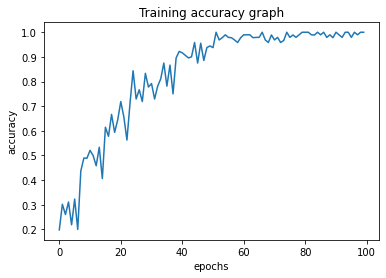

In [49]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'])

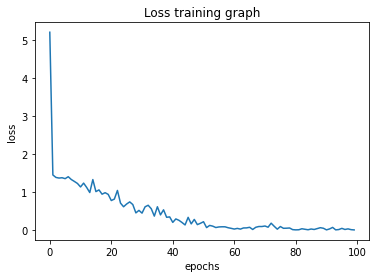

In [50]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'])

## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

(1, 224, 224, 3)
[[0. 0. 0. 1.]]
True classification


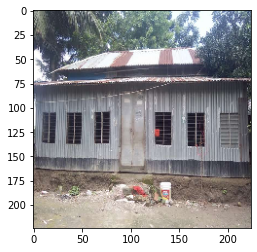

In [51]:
random_image=image.load_img('tinshed19.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print('True classification')

(1, 224, 224, 3)
[[1. 0. 0. 0.]]
True classification


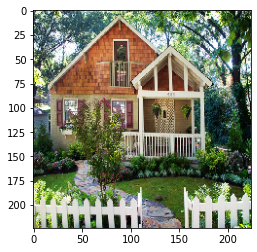

In [52]:
random_image=image.load_img('building0.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print('True classification')

(1, 224, 224, 3)
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2871621e-18]]
True classification


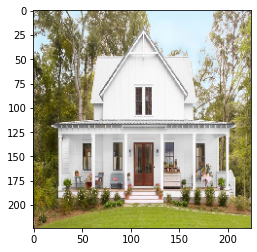

In [53]:
random_image=image.load_img('building1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print('True classification')

(1, 224, 224, 3)
[[0. 0. 1. 0.]]
False classification


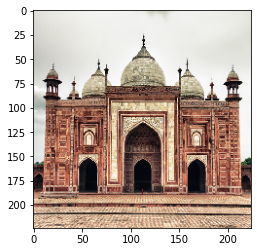

In [54]:
random_image=image.load_img('mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print('False classification')

## Classification report

In [55]:
predicted_y=model.predict(x_test)
print(predicted_y.shape)

(314, 4)


In [56]:
y_test_categorical.shape

(314, 4)

In [57]:
predicted_y=np.argmax(predicted_y, axis=1)
predicted_y.shape

(314,)

In [58]:
y_test.shape

(314,)

In [59]:
from sklearn.metrics import classification_report
print('Classification report \n',classification_report(predicted_y,y_test))

Classification report 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95        91
           1       0.95      1.00      0.98        83
           2       0.99      0.96      0.97        80
           3       0.92      1.00      0.96        60

    accuracy                           0.96       314
   macro avg       0.96      0.97      0.96       314
weighted avg       0.97      0.96      0.96       314



## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [69]:
import time
t = time.time()

export_path_keras = "Saved Model/CNN_model_{}.h5".format(int(t))
print(export_path_keras)
model.save(export_path_keras)

Saved Model/CNN_model_1615635197.h5


## Reload the model h5 format

In [61]:
from tensorflow.keras.models import load_model

In [63]:
model_path='Saved Model/CNN_model_1615634196.h5'
reload_model=load_model(model_path)
reload_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

## Experiment with reload model h5 format

In [64]:
print(len(reload_model.weights))
print(reload_model.output_shape)

12
(None, 4)


In [66]:
reload_model.layers

In [67]:
reload_model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-0.03634119, -0.09448896,  0.13069388,  0.00551381,
            0.05689829,  0.08383214,  0.10540603, -0.13958997,
            0.01779016, -0.10972177, -0.08850493, -0.09404734,
            0.03635839,  0.01480282, -0.08082901, -0.10037161,
            0.07272992,  0.10825869, -0.05597796, -0.02821817,
           -0.02024261,  0.07959636,  0.11895306, -0.11452227,
            0.11936655, -0.04585093,  0.0468045 , -0.11576843,
            0.02969554,  0.10235626, -0.08792205,  0.09994461],
          [-0.03740613, -0.1360713 ,  0.12782599, -0.08083925,
            0.04430338,  0.13969924,  0.02147677,  0.01090006,
           -0.04809215,  0.01475632,  0.11475167, -0.07540698,
           -0.12234903, -0.13191484,  0.00917565, -0.11325515,
           -0.01400059,  0.11723912, -0.08598249,  0.0440837 ,
            0.0643131 , -0.0994418 ,  0.07338007,  0.03169305,
            0.1010968 ,  0.13421616,  0.042